In [1]:
pip install faker pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Define the number of rows
num_rows = 500

# Generate synthetic data
data = {
    "Policy_ID": [fake.uuid4() for _ in range(num_rows)],
    "Customer_Age": [random.randint(18, 80) for _ in range(num_rows)],
    "Gender": [random.choice(["Male", "Female", "Other"]) for _ in range(num_rows)],
    "Policy_Type": [random.choice(["Health", "Auto", "Life", "Property"]) for _ in range(num_rows)],
    "Annual_Income": [round(random.uniform(20000, 200000), 2) for _ in range(num_rows)],
    "Claim_History": [random.randint(0, 10) for _ in range(num_rows)],
    "Fraudulent_Claim": [random.choice([0, 1]) for _ in range(num_rows)],
    "Premium_Amount": [round(random.uniform(500, 5000), 2) for _ in range(num_rows)],
    "Claim_Amount": [round(random.uniform(100, 10000), 2) for _ in range(num_rows)],
    "Risk_Score": [random.choice(["Low", "Medium", "High"]) for _ in range(num_rows)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("insurance_risk_claims_dataset.csv", index=False)

print("Dataset generated and saved as 'insurance_risk_claims_dataset.csv'")

Dataset generated and saved as 'insurance_risk_claims_dataset.csv'


In [3]:
df = pd.read_csv("insurance_risk_claims_dataset.csv")
df.head()


,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,411010a7-f307-441d-9735-f91f19c6992a,63,Male,Health,38661.66,1,0,3883.05,1364.02,Medium
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,Female,Health,74855.62,6,1,4449.38,8961.73,Medium
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,Male,Health,168421.41,5,0,3581.61,5501.17,Low
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,Other,Auto,21120.14,3,0,1771.17,2993.44,Medium
4,15daf703-f489-493b-a549-98c117609f2e,31,Male,Life,107171.40,7,1,2860.50,2720.05,Low


In [4]:
df = df.drop('Fraudulent_Claim', axis=1)

In [5]:
df_encoded = pd.get_dummies(df, columns=['Policy_Type', 'Gender','Risk_Score'], drop_first=False)
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,411010a7-f307-441d-9735-f91f19c6992a,63,38661.66,1,3883.05,1364.02,False,True,False,False,False,True,False,False,False,True
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,74855.62,6,4449.38,8961.73,False,True,False,False,True,False,False,False,False,True
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,168421.41,5,3581.61,5501.17,False,True,False,False,False,True,False,False,True,False
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,21120.14,3,1771.17,2993.44,True,False,False,False,False,False,True,False,False,True
4,15daf703-f489-493b-a549-98c117609f2e,31,107171.40,7,2860.50,2720.05,False,False,True,False,False,True,False,False,True,False


In [6]:
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,411010a7-f307-441d-9735-f91f19c6992a,63,38661.66,1,3883.05,1364.02,False,True,False,False,False,True,False,False,False,True
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,74855.62,6,4449.38,8961.73,False,True,False,False,True,False,False,False,False,True
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,168421.41,5,3581.61,5501.17,False,True,False,False,False,True,False,False,True,False
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,21120.14,3,1771.17,2993.44,True,False,False,False,False,False,True,False,False,True
4,15daf703-f489-493b-a549-98c117609f2e,31,107171.40,7,2860.50,2720.05,False,False,True,False,False,True,False,False,True,False


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['Annual_Income', 'Claim_Amount', 'Premium_Amount']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()


,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,411010a7-f307-441d-9735-f91f19c6992a,63,0.104030,1,0.754833,0.127687,False,True,False,False,False,True,False,False,False,True
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,0.306572,6,0.881935,0.898166,False,True,False,False,True,False,False,False,False,True
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,0.830166,5,0.687180,0.547232,False,True,False,False,False,True,False,False,True,False
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,0.005868,3,0.280860,0.292925,True,False,False,False,False,False,True,False,False,True
4,15daf703-f489-493b-a549-98c117609f2e,31,0.487411,7,0.525341,0.265201,False,False,True,False,False,True,False,False,True,False


In [8]:
Q1 = df_encoded['Claim_Amount'].quantile(0.25)  # 25th percentile
Q3 = df_encoded['Claim_Amount'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_encoded[(df_encoded['Claim_Amount'] < lower_bound) | (df_encoded['Claim_Amount'] > upper_bound)]
print("Outliers detected using IQR:\n", outliers)

Outliers detected using IQR:
 Empty DataFrame
Columns: [Policy_ID, Customer_Age, Annual_Income, Claim_History, Premium_Amount, Claim_Amount, Policy_Type_Auto, Policy_Type_Health, Policy_Type_Life, Policy_Type_Property, Gender_Female, Gender_Male, Gender_Other, Risk_Score_High, Risk_Score_Low, Risk_Score_Medium]
Index: []


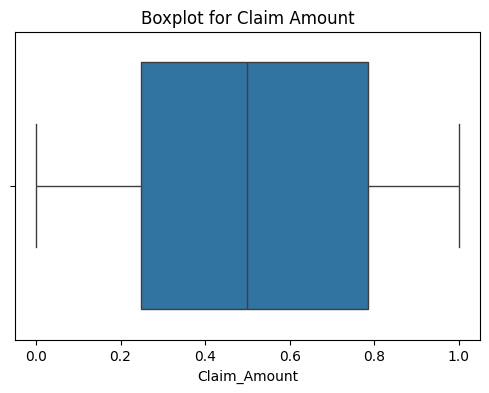

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df_encoded['Claim_Amount'])
plt.title("Boxplot for Claim Amount")
plt.show()

In [10]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Assume 5% fraud
df_encoded['Anomaly'] = iso_forest.fit_predict(df_encoded[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])
df_encoded['Anomaly'] = df_encoded['Anomaly'].apply(lambda x: 1 if x == -1 else 0)
# Display Anomalies (Fraudulent Claims)
#fraud_cases = df_encoded[df_encoded['Anomaly'] == 1]
#fraud_cases.head()
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,411010a7-f307-441d-9735-f91f19c6992a,63,0.104030,1,0.754833,0.127687,False,True,False,False,False,True,False,False,False,True,0
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,0.306572,6,0.881935,0.898166,False,True,False,False,True,False,False,False,False,True,0
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,0.830166,5,0.687180,0.547232,False,True,False,False,False,True,False,False,True,False,0
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,0.005868,3,0.280860,0.292925,True,False,False,False,False,False,True,False,False,True,0
4,15daf703-f489-493b-a549-98c117609f2e,31,0.487411,7,0.525341,0.265201,False,False,True,False,False,True,False,False,True,False,0


In [11]:
df_encoded = df_encoded.drop('Policy_ID', axis=1)


In [12]:
df_encoded.head()

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,63,0.104030,1,0.754833,0.127687,False,True,False,False,False,True,False,False,False,True,0
1,61,0.306572,6,0.881935,0.898166,False,True,False,False,True,False,False,False,False,True,0
2,33,0.830166,5,0.687180,0.547232,False,True,False,False,False,True,False,False,True,False,0
3,79,0.005868,3,0.280860,0.292925,True,False,False,False,False,False,True,False,False,True,0
4,31,0.487411,7,0.525341,0.265201,False,False,True,False,False,True,False,False,True,False,0


In [13]:
df_encoded

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,63,0.104030,1,0.754833,0.127687,False,True,False,False,False,True,False,False,False,True,0
1,61,0.306572,6,0.881935,0.898166,False,True,False,False,True,False,False,False,False,True,0
2,33,0.830166,5,0.687180,0.547232,False,True,False,False,False,True,False,False,True,False,0
3,79,0.005868,3,0.280860,0.292925,True,False,False,False,False,False,True,False,False,True,0
4,31,0.487411,7,0.525341,0.265201,False,False,True,False,False,True,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,69,0.755306,10,0.190094,0.988896,False,False,True,False,False,True,False,True,False,False,0
496,67,0.655400,6,0.560042,0.585028,True,False,False,False,True,False,False,True,False,False,0
497,44,0.174975,8,0.487196,0.590183,False,True,False,False,True,False,False,False,False,True,0
498,72,0.232573,6,0.935956,0.819493,False,False,True,False,False,False,True,False,False,True,0


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.DataFrame(data)

# Encoding Categorical Variables
label_encoder = LabelEncoder()

df_encoded["Policy_Type"] = label_encoder.fit_transform(df_encoded["Policy_Type"])
df_encoded["Gender"] = label_encoder.fit_transform(df_encoded["Gender"])
df_encoded["Risk_Score"] = label_encoder.fit_transform(df_encoded["Risk_Score"])

# Display Converted DataFrame
print(df_encoded)


                                Policy_ID  Customer_Age  Gender  Policy_Type  \
0    411010a7-f307-441d-9735-f91f19c6992a            63       1            1   
1    3339efc2-7c2d-452a-89e8-c8bd18ed2f7a            61       0            1   
2    99c3afac-b213-47ce-aff3-ffc9361ac6a9            33       1            1   
3    21d672a6-e0ea-457d-b201-3b423aff28c4            79       2            0   
4    15daf703-f489-493b-a549-98c117609f2e            31       1            2   
..                                    ...           ...     ...          ...   
495  8fe2758f-06e1-48dc-9619-eff686977088            69       1            2   
496  ee499dc1-c2cd-41b1-9c4e-61f9626e24dc            67       0            0   
497  6e97fd1a-0263-4e89-a630-3d2c7f451278            44       0            1   
498  572e255e-4284-427f-9f2b-859acd6a7a01            72       2            2   
499  ee57825d-6437-4105-a65b-ac4ebd568577            68       2            3   

     Annual_Income  Claim_History  Frau

In [15]:
import pandas as pd

# Assuming 'df' is your preprocessed DataFrame
df_encoded.to_csv("preprocessed_insurance_data.csv", index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


In [16]:
from google.colab import files

# Download the preprocessed CSV file
files.download("preprocessed_insurance_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Assuming 5% fraud
df_encoded['Anomaly'] = iso_forest.fit_predict(df_encoded[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])
df_encoded['Anomaly'] = df_encoded['Anomaly'].apply(lambda x: 1 if x == -1 else 0)  # Convert to 0 or 1 (fraud or not)

# View the dataset with anomaly labels
df_encoded.head()


,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Anomaly
0,411010a7-f307-441d-9735-f91f19c6992a,63,1,1,38661.66,1,0,3883.05,1364.02,2,0
1,3339efc2-7c2d-452a-89e8-c8bd18ed2f7a,61,0,1,74855.62,6,1,4449.38,8961.73,2,0
2,99c3afac-b213-47ce-aff3-ffc9361ac6a9,33,1,1,168421.41,5,0,3581.61,5501.17,1,0
3,21d672a6-e0ea-457d-b201-3b423aff28c4,79,2,0,21120.14,3,0,1771.17,2993.44,2,0
4,15daf703-f489-493b-a549-98c117609f2e,31,1,2,107171.40,7,1,2860.50,2720.05,1,0


In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features and target column
X = df_encoded.drop(columns=['Anomaly', 'Policy_ID'])  # Drop 'Policy_ID' for model training
y = df_encoded['Anomaly']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Class distribution after SMOTE: Counter({0: 475, 1: 475})


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.98      0.99      0.98        98

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

AUC-ROC Score: 0.9840283939662822
Confusion Matrix:
 [[90  2]
 [ 1 97]]


In [19]:
import pickle

# Assuming 'rf_model' is your trained RandomForest model

# Save the trained model using pickle
with open("insurance_risk_claims_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully as 'insurance_risk_claims_model.pkl'")


Model saved successfully as 'insurance_risk_claims_model.pkl'
